In [4]:
from Inception.data_loader import data_loader

train_dir = r"../data/train"
test_dir = r"../data/test"
batch_size = 64
img_shape = (299, 299)

train_data, val_data, test_data = data_loader(train_dir, test_dir, batch_size, img_shape)

Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.
Training batches: 104
Validation batches: 6
Test batches: 6


In [5]:
import keras

input_shape = (299, 299, 3)

keras.utils.set_random_seed(123)
base_model = keras.applications.InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.trainable = False

inputs = keras.Input(shape=input_shape)
x = keras.applications.inception_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(units=1, activation="sigmoid")(x)
inception = keras.Model(inputs, outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
from Inception.train import train

initial_epochs = 10
initial_learning_rate = 0.00001
threshold = 0.5
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
accuracy_metric = keras.metrics.BinaryAccuracy(threshold=threshold, name="accuracy")

history = train(
    model=inception,
    train_data=train_data,
    val_data=val_data,
    optimizer=optimizer,
    loss=loss,
    epochs=initial_epochs,
    accuracy_metric=accuracy_metric,
    verbose=False,
)

I0000 00:00:1734820420.015343      74 service.cc:145] XLA service 0x7c31c80041e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734820420.015400      74 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734820433.493427      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.7701 - f1_score: 0.6384 - loss: 0.5805 - precision: 0.9374 - recall: 0.4842
Training results on epoch 10:
Loss: 0.5833
Accuracy: %76.0
Precision: %94.0
Recall: %49.0
F1 Score: %64.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7330 - f1_score: 0.4888 - loss: 0.5703 - precision: 0.8178 - recall: 0.3490 
Validation results on epoch 10:
Loss: 0.5653
Accuracy: %74.0
Precision: %88.0
Recall: %35.0
F1 Score: %50.0


In [7]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [8]:
base_model.trainable = True

at = 100
for layer in base_model.layers[:at]:
    layer.trainable = False

Epoch 10/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.6944 - f1_score: 0.6033 - loss: 0.5978 - precision: 0.6507 - recall: 0.5625
Epoch 10: val_loss improved from inf to 0.53755, saving model to Inception/best_net.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 91s 507ms/step - accuracy: 0.6947 - f1_score: 0.6039 - loss: 0.5975 - precision: 0.6513 - recall: 0.5631 - val_accuracy: 0.8369 - val_f1_score: 0.8138 - val_loss: 0.5376 - val_precision: 0.7024 - val_recall: 0.9672
Epoch 11/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8459 - f1_score: 0.8205 - loss: 0.4379 - precision: 0.8313 - recall: 0.8100
Epoch 11: val_loss improved from 0.53755 to 0.35221, saving model to Inception/best_net.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 28s 266ms/step - accuracy: 0.8461 - f1_score: 0.8208 - loss: 0.4376 - precision: 0.8315 - recall: 0.8105 - val_accuracy: 0.9305 - val_f1_score: 0.9132 - val_loss: 0.3522 - val_precision: 0.8462 - val_recall: 0.9918
Epoch 12/40
104/104 ━━━━━━━━━━━━━━━━━━

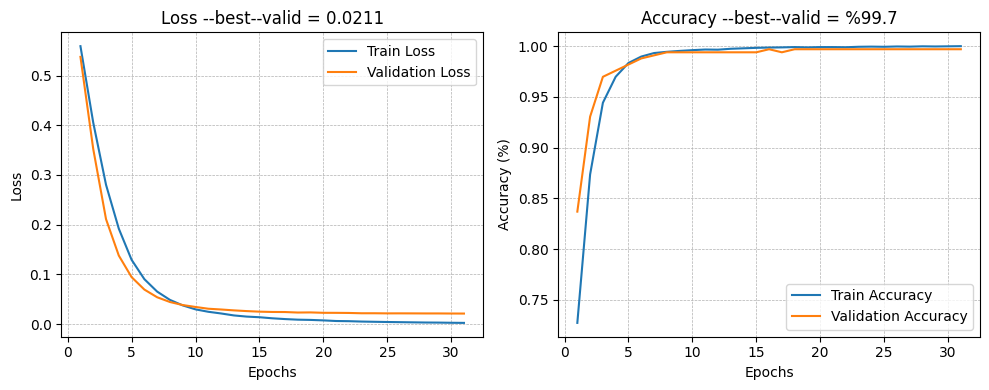

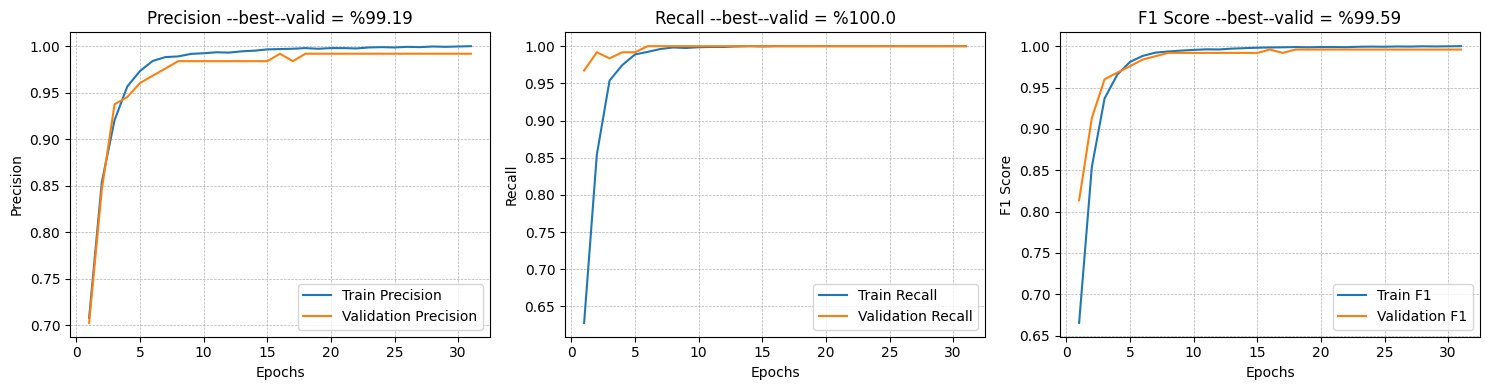

In [9]:
trial_dir = "Inception"
patience = 5
fine_tune_learning_rate = initial_learning_rate / 10
fine_tune_epochs = 30 + initial_epochs
optimizer= keras.optimizers.RMSprop(learning_rate=fine_tune_learning_rate)

history = train(
    model=inception,
    train_data=train_data,
    val_data=val_data,
    optimizer=optimizer,
    loss=loss,
    epochs=fine_tune_epochs,
    accuracy_metric=accuracy_metric,
    patience=patience,
    trial_dir=trial_dir,
    initial_epoch=history.epoch[-1],
    verbose=True,
)

Loss: 0.0211
Accuracy: %100.0
Precision: %99.0
Recall: %100.0
F1 Score: %100.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


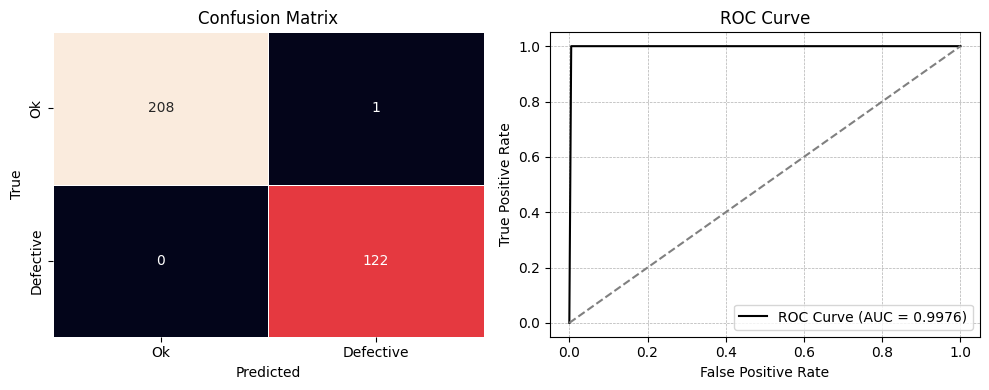

In [10]:
from Inception.evaluate import evaluate

evaluate(
    model=inception,
    data=val_data,
    threshold=threshold,
    trial_dir=trial_dir,
)